In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

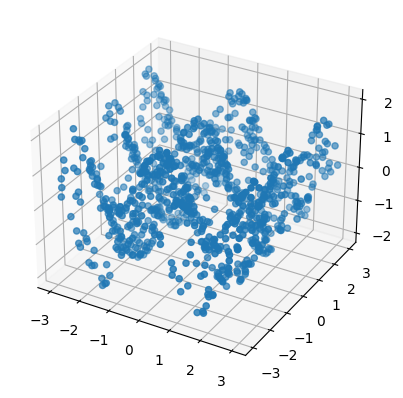

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y);

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2, ), activation="relu"),
    tf.keras.layers.Dense(1)
])

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss="mse"
)
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9985
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9409
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9151
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9451
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8671
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8336
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7862
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7161
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6978
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6313
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5986
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6351
Epoch 13/100
32/32 [=================

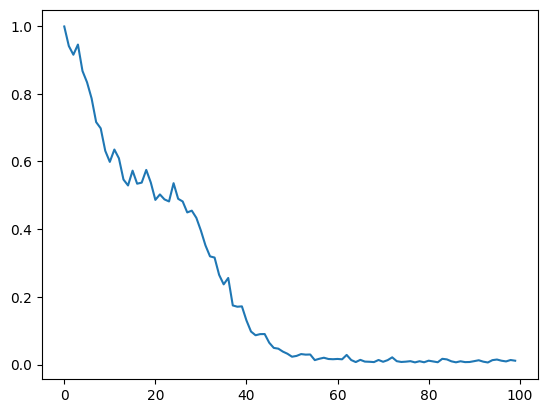

In [8]:
plt.plot(r.history["loss"], label="loss")

79/79 [==============================] - 1s 8ms/step


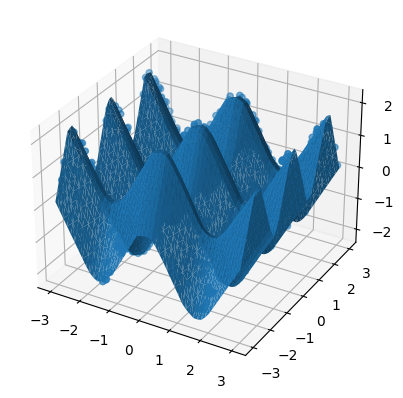

In [9]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 3ms/step


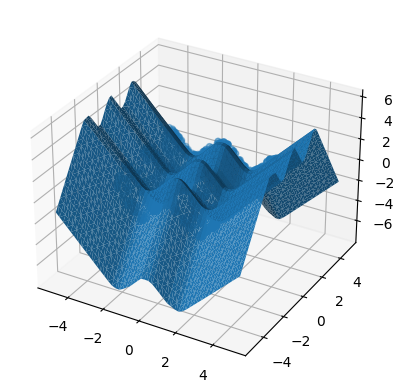

In [10]:
# The NN cannot extrapolate
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()